# <b>STELLAR ENTITY CLASSIFICATION
- In This notebook will walk you through a step-by-step to perform exploratory data analysis and machine learning modelling for the task of classifying stellar entities
- This machine learning model will classify whether a stellar entity is a <b>Galaxy, Quasar, or a Star</b>.

## <b>Import dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

## Data Preparation
Load the data into a pandas dataframe

In [6]:
df= pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [7]:
df.shape

(100000, 18)

Based on the shape of the dataframe, the dataset contains 100,000 instances with 18 columns

## Statistical summary of the data

In [8]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


## Check if there are null values

In [9]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

## Check the data types of each column

In [10]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

Based on the cell output above, all the fields seem to have the correct data type

## Data distribution per class

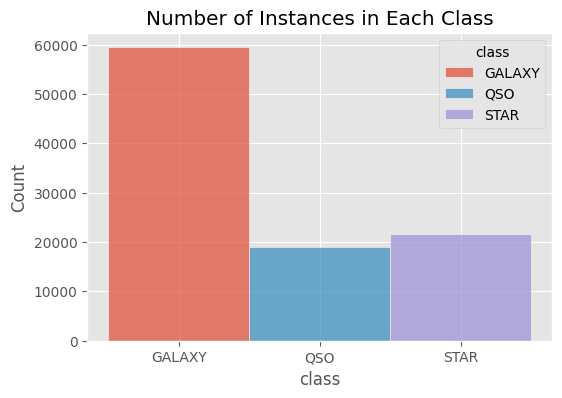

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='class', hue='class', alpha=.7)
plt.title('Number of Instances in Each Class')
plt.show()

- Based on the graph above, the distribution of data per class is imbalanced. To deal with this, oversampling will be performed later.
- <b>Oversampling</b> is a method that involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.

## Change the target variable into numeric value
- <b>Galaxy</b>: 0
- <b>Quasar</b>: 1
- <b>Star</b>: 2

In [12]:
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])

## Check if there are significant relationship between each feature and the target variable
In order to select which columns to include as features for the machine learning model to be made, checking the relationships of the independent variables and dependent variables is important

In [13]:
feature_columns = df.columns.drop('class')

### Box Plots

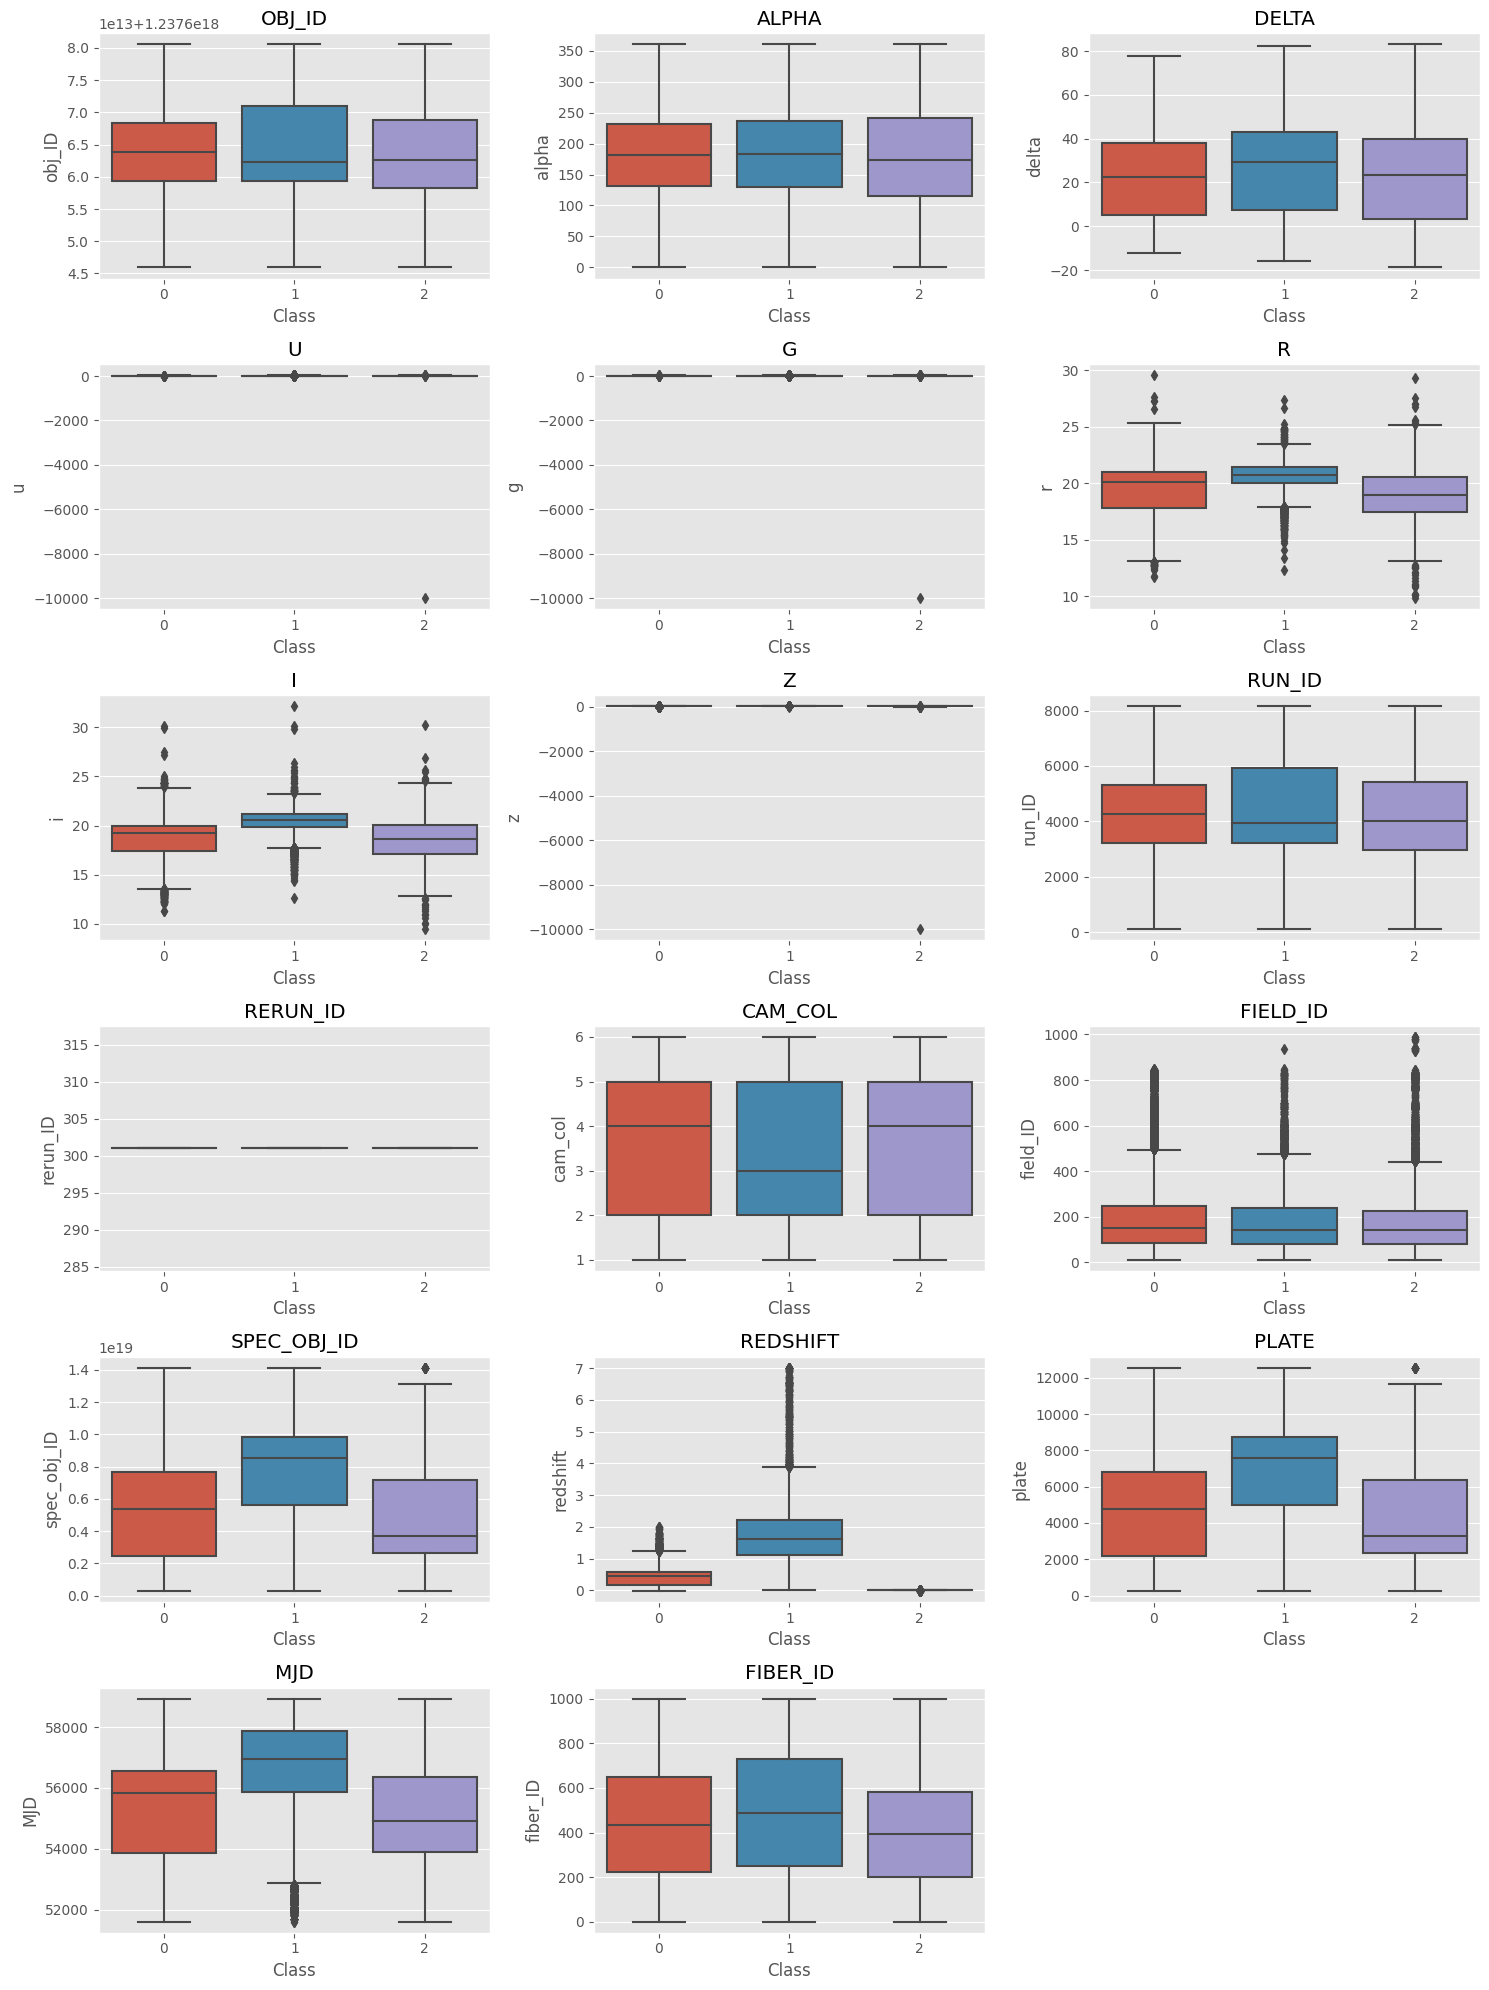

In [14]:
num_plots = len(feature_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, cols in enumerate(feature_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='class', y=cols, data=df, ax=axes[row, col])
    axes[row, col].set_title(cols.upper())
    axes[row, col].set_xlabel('Class')
    axes[row, col].set_ylabel(cols)

for i in range(len(feature_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### Violin Plots

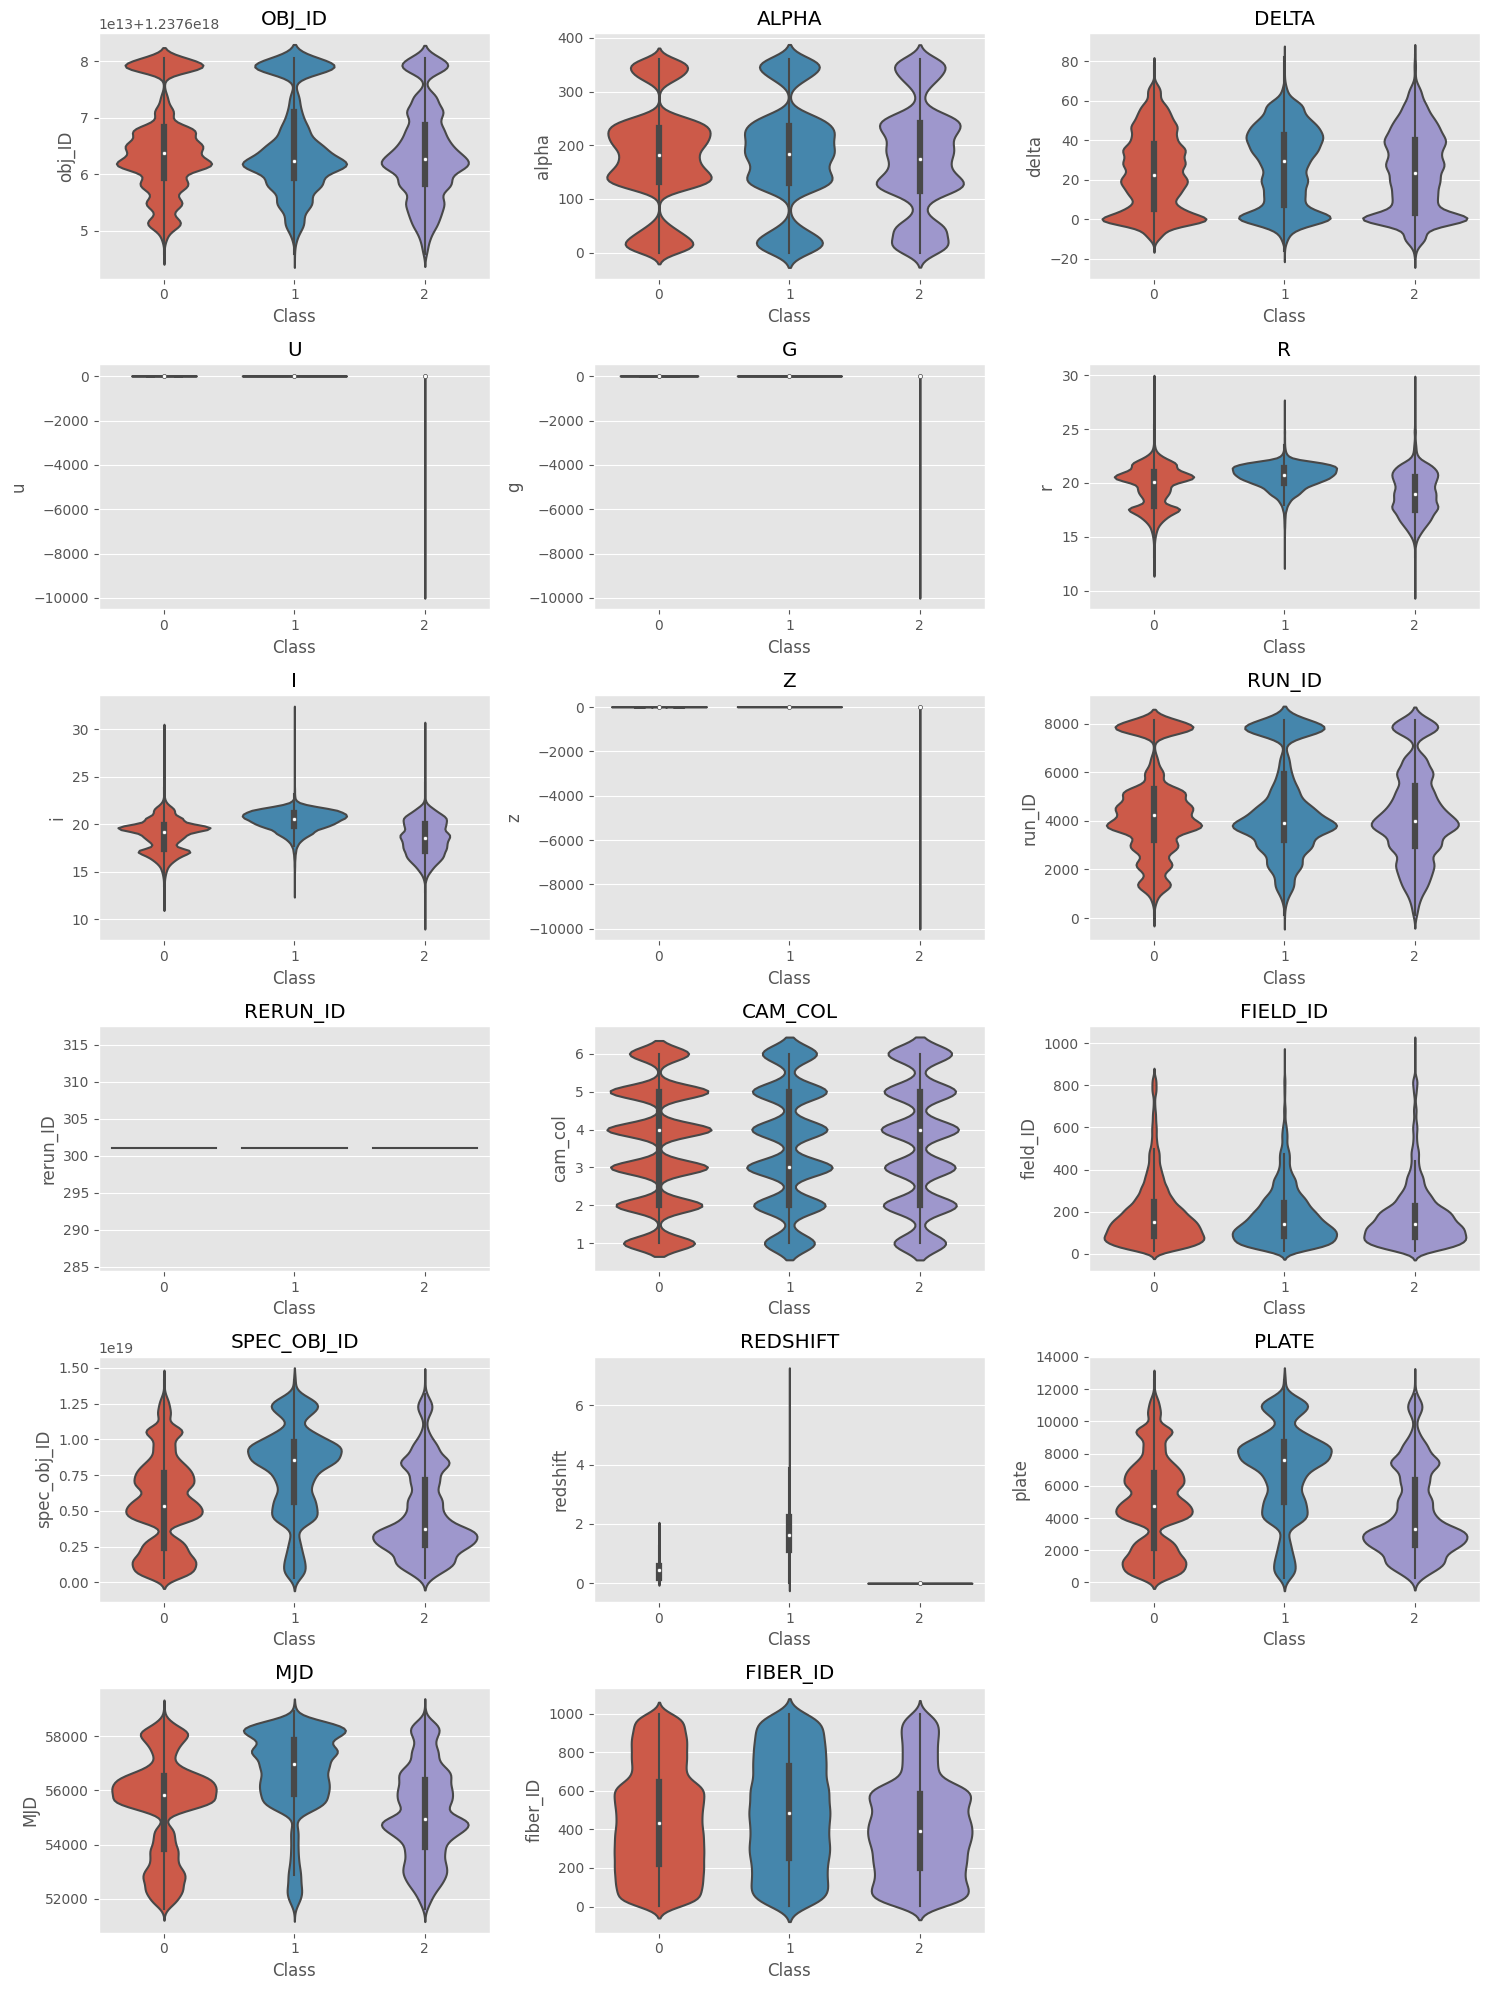

In [15]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, cols in enumerate(feature_columns):
    row = i // num_cols
    col = i % num_cols
    sns.violinplot(x='class', y=cols, data=df, ax=axes[row, col])
    axes[row, col].set_title(cols.upper())
    axes[row, col].set_xlabel('Class')
    axes[row, col].set_ylabel(cols)

for i in range(len(feature_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Check if there are correlated fields

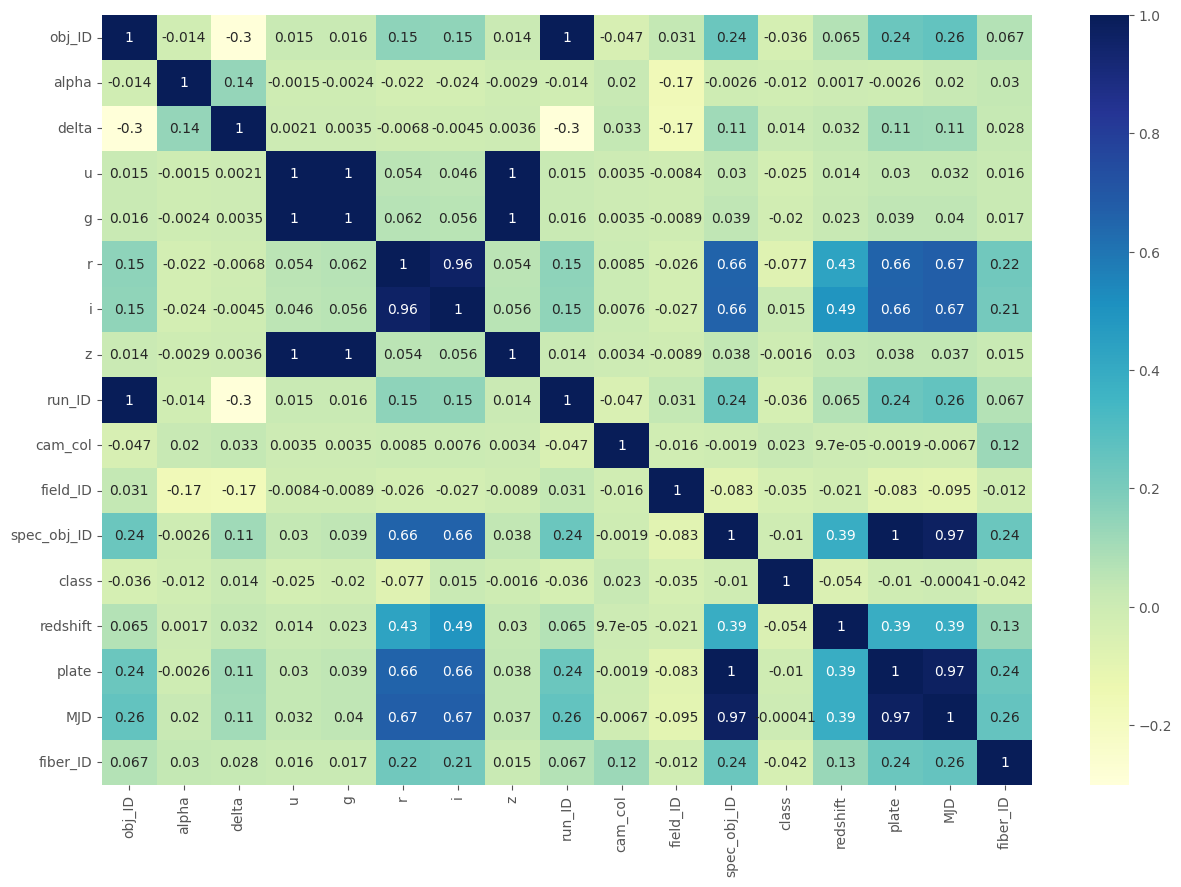

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop('rerun_ID', axis=1).corr(), annot=True, cmap="YlGnBu")
plt.show()

## Select the feature variables

Based on the visualization above, the columns that could possibly be a good predictor variable were determined.
Those variables were selected from the data and will be fed into the machine learning model as feature variables.

In [17]:
X = df[['u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'redshift', 'plate', 'MJD']]

## Define the target variable

In [18]:
y = df['class']

## Feature Variable Distributions

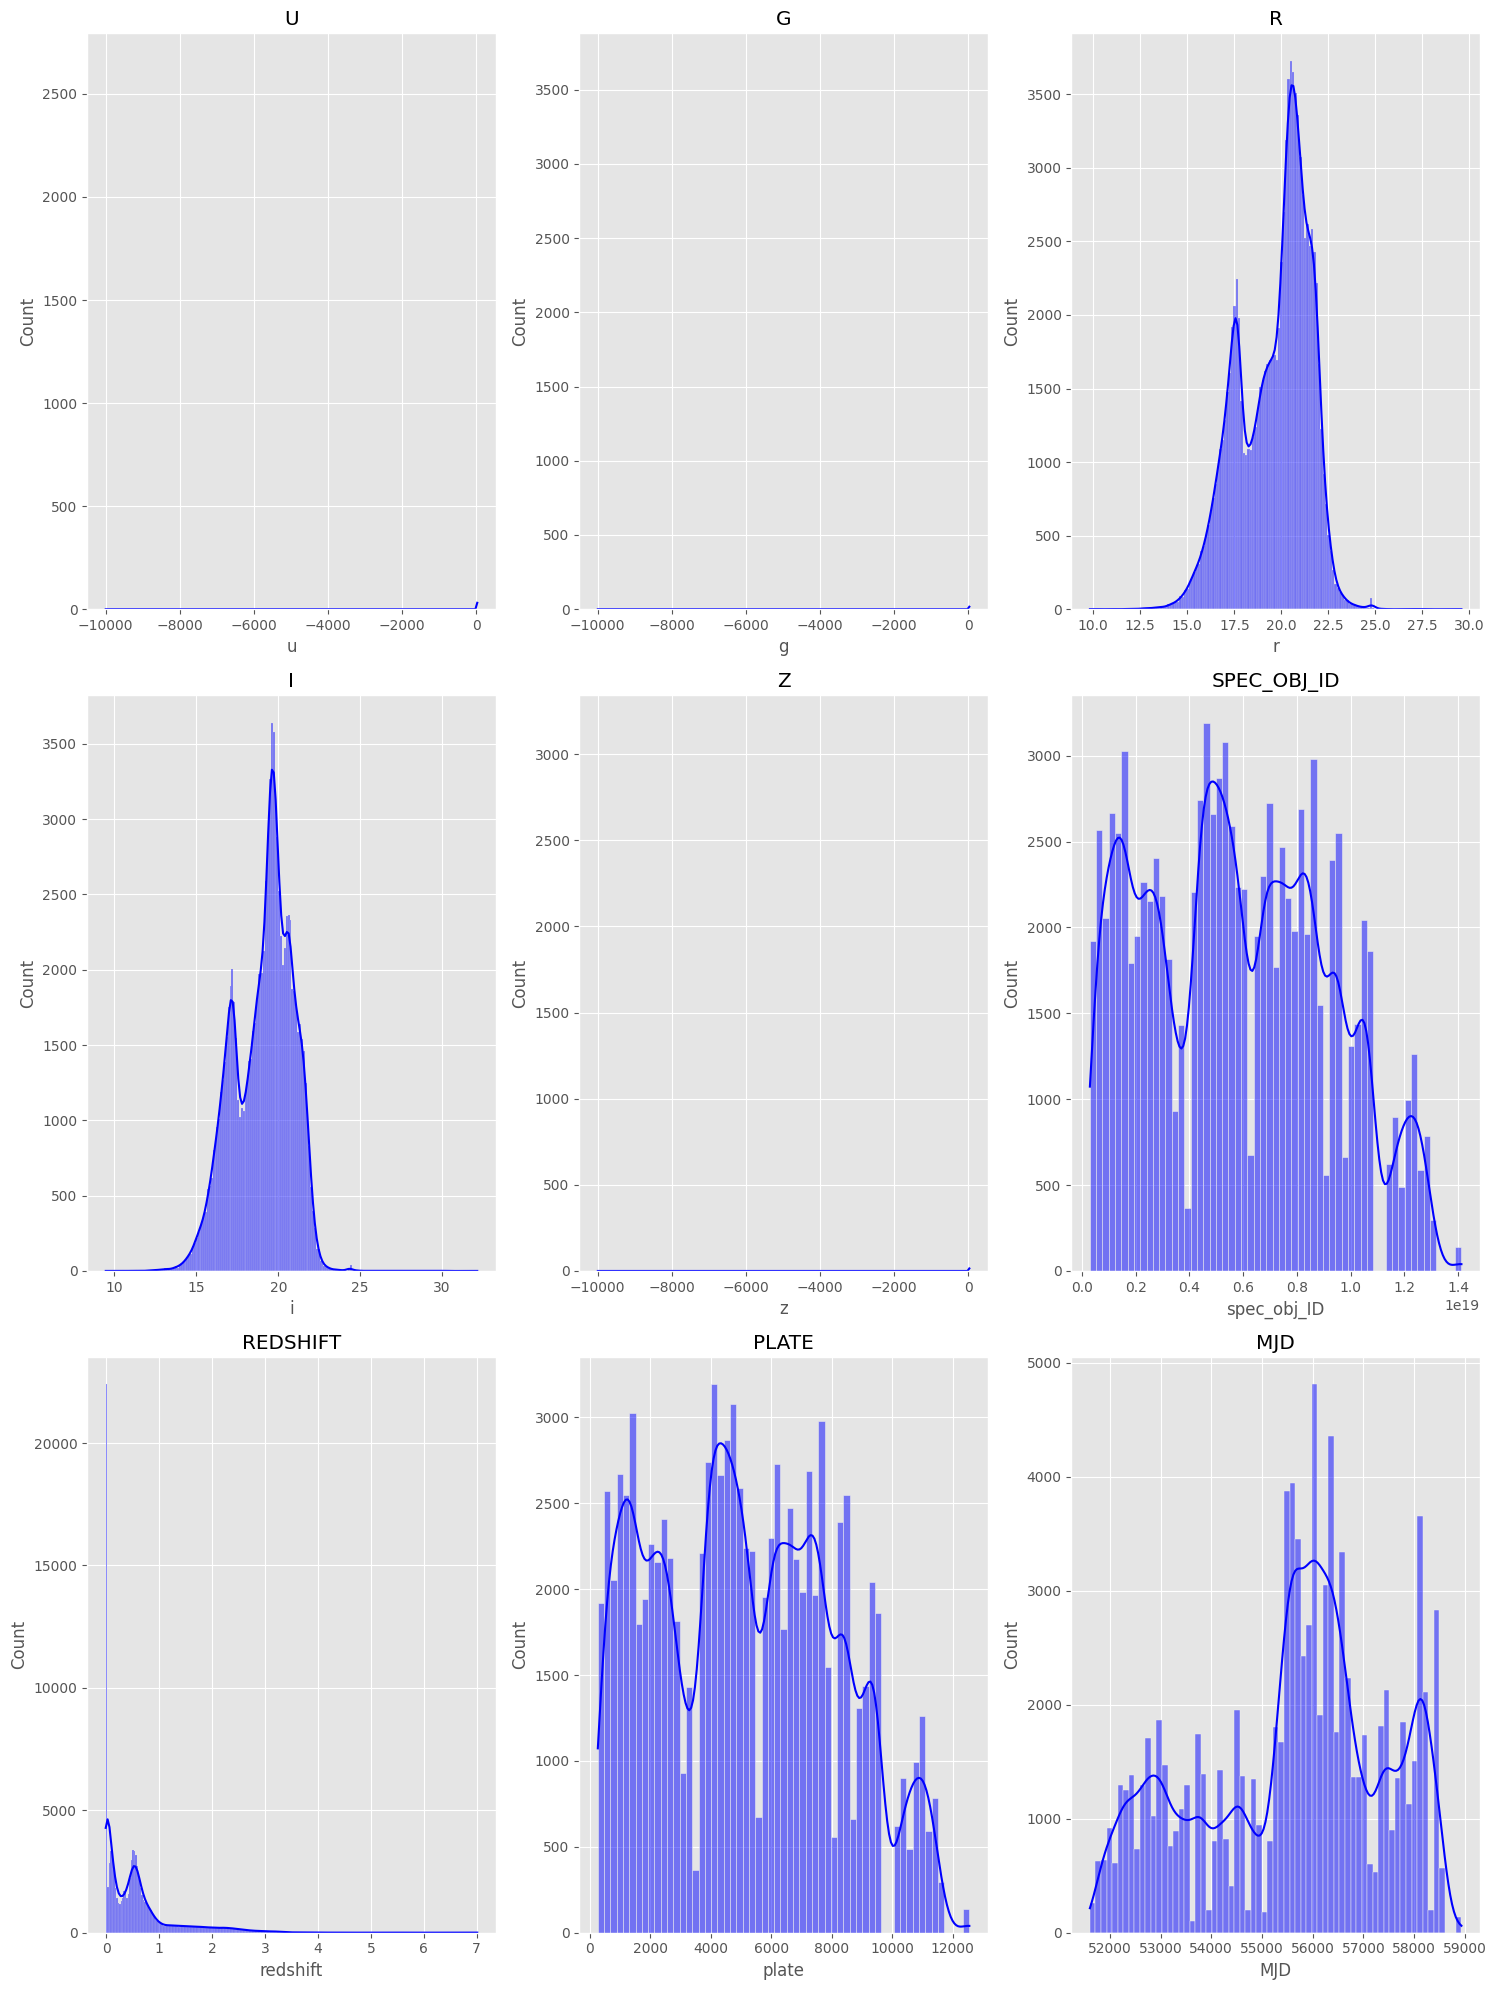

In [19]:
num_plots = len(X.columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, cols in enumerate(X.columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(X[cols], kde=True, alpha=0.5, color='blue', ax=axes[row, col])
    axes[row, col].set_title(cols.upper())

for i in range(len(feature_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Oversampling

Since the the number of instances in each class is imbalanced, oversampling was performed.

In [20]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [21]:
y.value_counts()

0    59445
1    59445
2    59445
Name: class, dtype: int64

## Prepare the training and testing datasets

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 777)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((142668, 9), (35667, 9), (142668,), (35667,))

## Model Training

In [24]:
# store the different classification algorithms in a list
classifiers = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

In [25]:
best_model = None
best_accuracy = 0

for classifier in classifiers:
    pipeline = make_pipeline(StandardScaler(), classifier)
    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = classifier.__class__.__name__

    print(f"{classifier.__class__.__name__} - Accuracy: {accuracy}")

print(f"The best performing model is: {best_model} with accuracy: {best_accuracy}")


LogisticRegression - Accuracy: 0.9596826197886001
SVC - Accuracy: 0.968710572798385
RandomForestClassifier - Accuracy: 0.9827571704937337
KNeighborsClassifier - Accuracy: 0.966187231895029
GaussianNB - Accuracy: 0.6887038438893095
DecisionTreeClassifier - Accuracy: 0.9718787674881543
AdaBoostClassifier - Accuracy: 0.6593489780469342
GradientBoostingClassifier - Accuracy: 0.9758039644489304
ExtraTreesClassifier - Accuracy: 0.9824487621611013
BaggingClassifier - Accuracy: 0.9806824235287521
MLPClassifier - Accuracy: 0.9765329295987888
XGBClassifier - Accuracy: 0.9815515742843525
The best performing model is: RandomForestClassifier with accuracy: 0.9827571704937337


Based on the accuracy of all the models trained, <b>Random Forest Classifier</b> showed the best performance with an accuracy of 98.27%

## Hyperparameter Tuning

Based on the results of training different classification models, Random Forest Classifier exhibited superior accuracy among all the models trained. Hyperparameter tuning was then performed on the Random Forest Classifier

In [27]:
# pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# param_grid = {
#     'randomforestclassifier__n_estimators': [50, 100, 200],
#     'randomforestclassifier__max_depth': [None, 10, 20],
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(x_train, y_train)

# best_params = grid_search.best_params_

In [ ]:
# print("Best Parameters:", best_params)

## Model training with the best model and hyperparameters

In [28]:
model = RandomForestClassifier(n_estimators=200, max_depth=None)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

## Generate predictions

In [29]:
predictions = model.predict(x_test)

## Model Evaluation

### Determine the importance of each feature

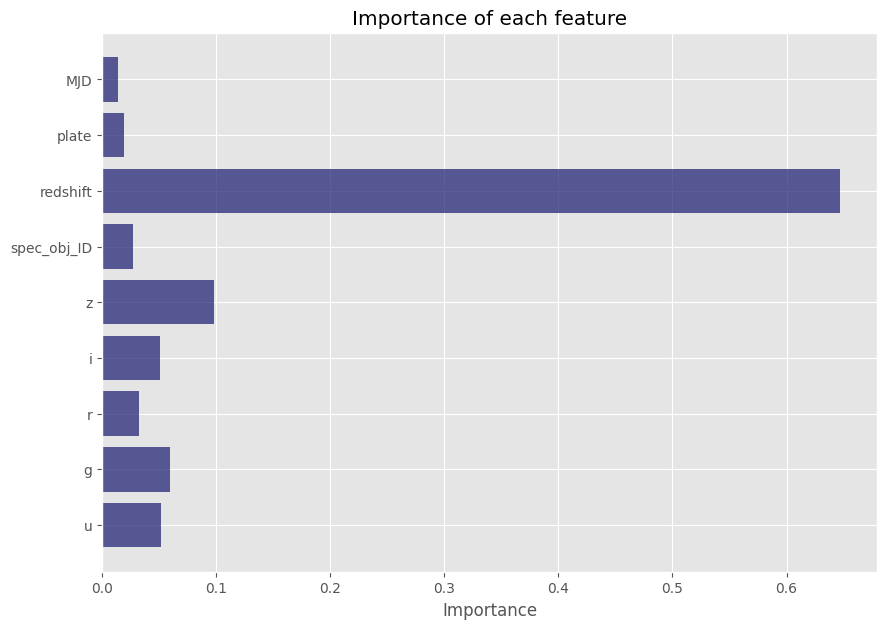

In [30]:
feature_names = ['u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'redshift', 'plate', 'MJD']
feature_importances = model.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances, color='midnightblue', alpha=.7)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Importance of each feature")
ax.set_xlabel("Importance")
plt.show()

Based on the graph above, the <b>redshift value</b> is the superior feature in terms of importance, followed by <b>z</b> (Infrared filter in the photometric system) and <b>g</b> (Green filter in the photometric system).

## Classification Report
Determine the performance of the model using some performance evaluation metrics (accuracy, precision, recall, f1_score, support).

In [31]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.96919   0.97781   0.97348     11806
           1    0.98006   0.96957   0.97479     11962
           2    0.99774   0.99966   0.99870     11899

    accuracy                        0.98234     35667
   macro avg    0.98233   0.98235   0.98232     35667
weighted avg    0.98236   0.98234   0.98233     35667



## Confusion Matrix

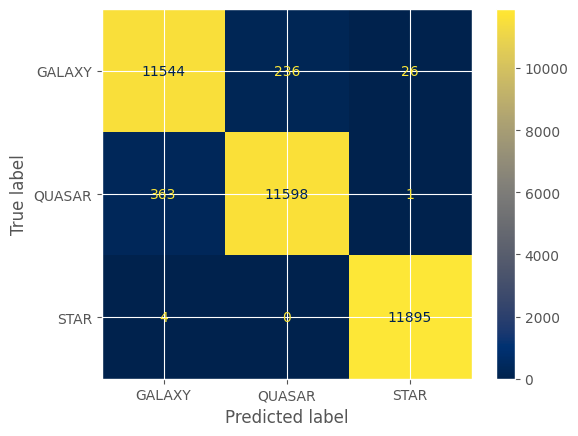

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = 'cividis',
                                        display_labels = ['GALAXY', 'QUASAR', 'STAR'])

Using this machine learning model, stellar entities can be classified given a set of features